Case-Study Group-1

# **Problem Statement**: Prediction of health status based on BMI


**What is BMI?**

The body mass index (BMI) is a measure that uses your height and weight to work out if your weight is healthy.

If your BMI is:

**below 12** – you are in the extreamly weak range

**between 12 and 18.0** – you are in the Weak range

**between 18.1 and 24.9** – you are in the healthy weight range

**between 25 and 29.9** – you are in the overweight range

**between 30 and 39.9** – you are in the obese range 

**more then 40** – you are in the extreamly obese range


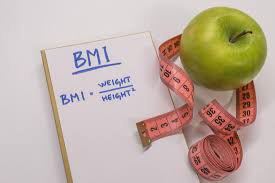

In [2]:
from IPython.display import Image
Image(filename='/content/5e4dc52f-cf9f-4300-a08d-6dc75f67d625.jpg')

## **Data Preparation**
Using Machine Learning to predict a person's health status and if it is other than normal he/she can take certain measures to get back to normal. The dataset has been taken from Kaggle The objective of the dataset is to diagnostically predict a person's health based on certain diagnostic measurements included in the dataset.The data consists information of both Females and Males.

We’ll be using Python and some of its popular data science related packages.

1.Pandas: to read our data from a CSV file and manipulate it for further use.

2.Numpy: to convert out data into a format suitable to feed our classification model.

3.Seaborn and matplotlib: for visualizations.

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib
%matplotlib inline

In [0]:
data = pd.read_csv('500_Person_Gender_Height_Weight_Index.csv')
data_clean = pd.read_csv('500_Person_Gender_Height_Weight_Index.csv')

In [5]:
data.head(9)

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3
5,Male,189,104,3
6,Male,147,92,5
7,Male,154,111,5
8,Male,174,90,3


We have 500 entries with 3 features including a label

In [6]:
data.shape

(500, 4)

There were No null values in the given dataset.

In [7]:
data.isnull().any()

Gender    False
Height    False
Weight    False
Index     False
dtype: bool

In [8]:
data['Index'].value_counts()

5    198
4    130
2     69
3     68
1     22
0     13
Name: Index, dtype: int64

IIn the given dataset we can see that there are 6 unique values for the health status i.e. (0 to 5).

Where as '0' indicates The Person is extremely weak

'1' indicates The Person is weak

'2' indicates The Person is normal

'3' indicates The Person is Overweight

'4' indicates The Person is Obese

'5' indicates The Person is 'Extreme Obese'.

We will add an additional columns to our DataFrame as per need.


BMI in an individual is calculated by the use of a mathematical formula. It can also be estimated using tables in which one can match height in inches to weight in pounds to estimate BMI. 

***The formula is - BMI = (Weight in kilograms) divided by (Height in metres squared)***

In [9]:
data_clean['BMI'] = data_clean['Weight']/((data_clean['Height']/100)**2)
data_clean 

,Gender,Height,Weight,Index,BMI
0,Male,174,96,4,31.708284
1,Male,189,87,2,24.355421
2,Female,185,110,4,32.140248
3,Female,195,104,3,27.350427
4,Male,149,61,3,27.476240
...,...,...,...,...,...
495,Female,150,153,5,68.000000
496,Female,184,121,4,35.739603
497,Female,141,136,5,68.407022
498,Male,150,95,5,42.222222


In [10]:
def covert_bmi(x):
    if x['Index'] == 0:
        return 'Extremely Weak'
    elif x['Index'] == 1:
        return 'Weak'
    elif x['Index'] == 2:
        return 'Normal'
    elif x['Index'] == 3:
        return 'Overweight'
    elif x['Index']== 4:
        return 'Obesity'
    elif x['Index'] == 5:
        return 'Extreme Obesity'
data_clean['Status'] = data_clean.apply(covert_bmi,axis=1)
data_clean.head(5)


,Gender,Height,Weight,Index,BMI,Status
0,Male,174,96,4,31.708284,Obesity
1,Male,189,87,2,24.355421,Normal
2,Female,185,110,4,32.140248,Obesity
3,Female,195,104,3,27.350427,Overweight
4,Male,149,61,3,27.476240,Overweight


Coverting character values into numeric values.

In [11]:
def convert_genderto_values(x):
    if x['Gender'] == 'Male':
        return 1
    elif x['Gender'] == 'Female':
        return 0

data_clean['gender_values'] = data_clean.apply(convert_genderto_values,axis=1)
data_clean.head(5)


,Gender,Height,Weight,Index,BMI,Status,gender_values
0,Male,174,96,4,31.708284,Obesity,1
1,Male,189,87,2,24.355421,Normal,1
2,Female,185,110,4,32.140248,Obesity,0
3,Female,195,104,3,27.350427,Overweight,0
4,Male,149,61,3,27.476240,Overweight,1


In [12]:
data_clean.Status.value_counts()

Extreme Obesity    198
Obesity            130
Normal              69
Overweight          68
Weak                22
Extremely Weak      13
Name: Status, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:574: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


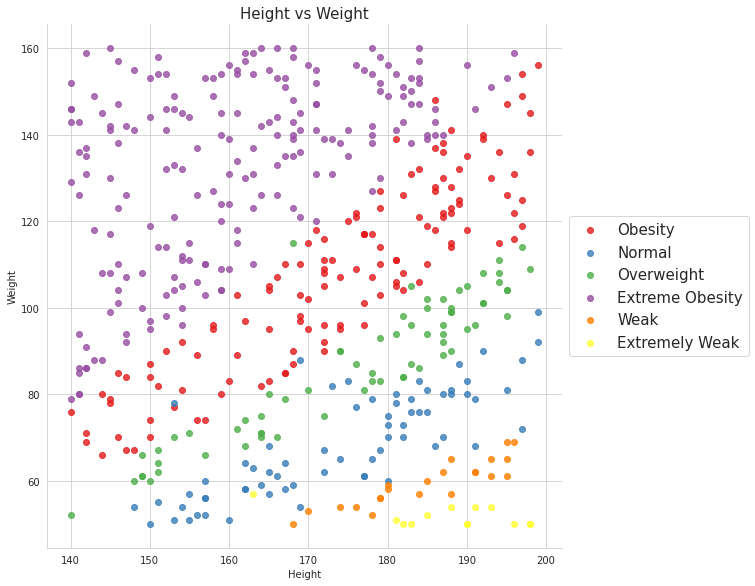

In [13]:
sns.set_style('whitegrid')
sns.lmplot( x='Height', y='Weight', data=data_clean, 
           fit_reg=False, 
           hue='Status', 
           legend=False, 
           palette='Set1',
           size = 8, 
           aspect = 1
          )

ax1 = plt.gca()
ax1.set_title('Height vs Weight', size=15)
box = ax1.get_position()

# Put a legend to the right of the current axis
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5),prop={'size': 15})


The above plot classifies the health status of the people according to height against weight


In [14]:
people = data_clean['Gender'].value_counts() 
print(people)

Female    255
Male      245
Name: Gender, dtype: int64


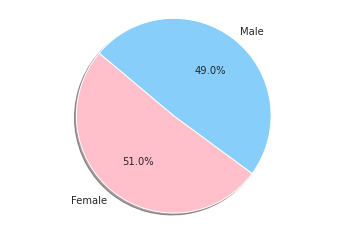

In [15]:
# Plot
labels = 'Female', 'Male'
sizes = [255, 245]
colors = ['pink', 'lightskyblue']

# Plot
plt.pie(sizes,  colors=colors,labels=labels,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

In [16]:
male_data = data_clean[data_clean['Gender'] == 'Male']
Female_data = data_clean[data_clean['Gender'] == 'Female']
data_visual_male_categories = male_data['Status'].value_counts() 
print("Count of BMI Status in male \n \n")


data_visual_male_categories

Count of BMI Status in male 
 



Extreme Obesity    105
Obesity             59
Overweight          32
Normal              28
Weak                15
Extremely Weak       6
Name: Status, dtype: int64

In [20]:
data_visual_male_categories = male_data['Status'].value_counts() 
data_visual_male_categories

print("Count of BMI Status in Female \n \n")
data_visual_female_categories  = Female_data['Status'].value_counts() 
data_visual_female_categories

Count of BMI Status in Female 
 



Extreme Obesity    93
Obesity            71
Normal             41
Overweight         36
Extremely Weak      7
Weak                7
Name: Status, dtype: int64

TypeError: ignored

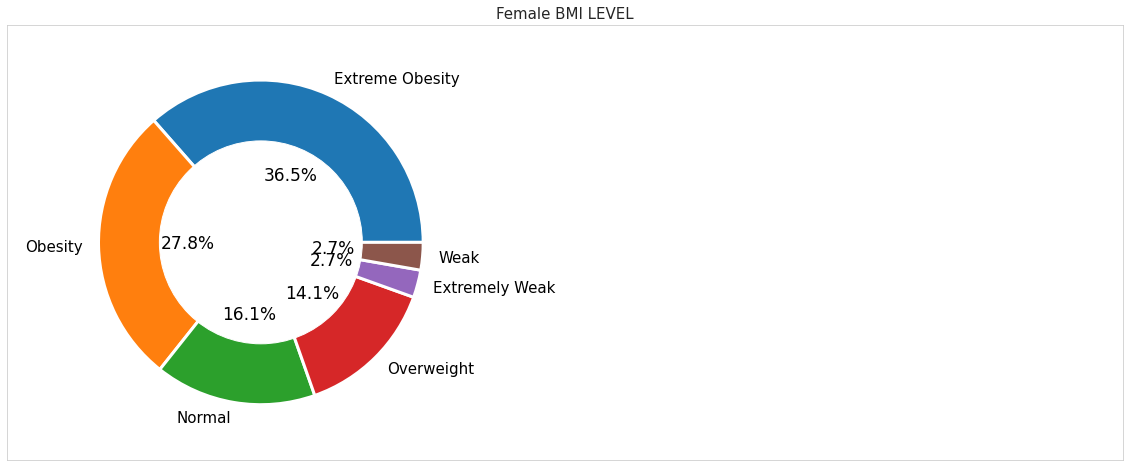

In [21]:
fig = plt.figure(figsize=(20,8))
plt.title("Female BMI LEVEL",loc='center',weight=10,size=15)
plt.xticks([]) # to disable xticks
plt.yticks([]) # to disable yticks

# first pie-plot
ax1 = fig.add_subplot(121)
ax1.axis('equal')

wedges, texts, autotexts =  ax1.pie(data_visual_female_categories,
                                    radius=0.8,
                                    
                                    labels=['Extreme Obesity','Obesity','Normal','Overweight','Extremely Weak','Weak'],
                                    autopct="%1.1f%%",
                                    pctdistance=0.45,
                                    textprops=dict(color='k'),
                                    wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'w' }
                                    )
plt.setp(autotexts,size=17)
plt.setp(texts,size=15)
my_circle = plt.Circle((0,0),0.5,color='white')
p = plt.gcf() # get current figure reference
p.gca().add_artist(my_circle) # get current axes
ax1(0,0,'Female',size=20,color='#1fa774',horizontalalignment='center',weight='bold')


Above chart represents the health status of Females that among all the females who has what status.According to the given data,most of the females are exteremely obese.

In [0]:
fig = plt.figure(figsize=(20,8))
plt.title("Male BMI LEVEL",loc='center',weight=10,size=15)
plt.xticks([]) # to disable xticks
plt.yticks([]) # to disable yticks

# Second pie-plot
ax2 = fig.add_subplot(121)
ax2.axis('equal')

wedges2, texts2, autotexts2 =  ax2.pie(data_visual_male_categories,
                                    radius=0.8,
                                    
                                    labels=['Extreme Obesity','Obesity','Overweight','Normal','Weak','Extremely Weak'],
                                    autopct="%1.1f%%",
                                    pctdistance=0.45,
                                    textprops=dict(color='k'),
                                    wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'w' }
                                    )
plt.setp(autotexts2,size=17)
plt.setp(texts2,size=15)
my_circle = plt.Circle((0,0),0.5,color='white')
p = plt.gcf() # get current figure reference
p.gca().add_artist(my_circle) # get current axes
ax2(0,0,'Male',size=20,color='#1fa774',horizontalalignment='center',weight='bold')


Above chart represents the health status of Males that among all the males who has what status.According to the given data,most of the Males are exteremely obese.

**Training and Tuning the model**


**One HOT Encoding**


One hot encoding is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better performance in training the dataset.



In [22]:
one_hot_data = pd.concat([data_clean, pd.get_dummies(data_clean['Gender'], prefix='gender')], axis=1)
one_hot_data

,Gender,Height,Weight,Index,BMI,Status,gender_values,gender_Female,gender_Male
0,Male,174,96,4,31.708284,Obesity,1,0,1
1,Male,189,87,2,24.355421,Normal,1,0,1
2,Female,185,110,4,32.140248,Obesity,0,1,0
3,Female,195,104,3,27.350427,Overweight,0,1,0
4,Male,149,61,3,27.476240,Overweight,1,0,1
...,...,...,...,...,...,...,...,...,...
495,Female,150,153,5,68.000000,Extreme Obesity,0,1,0
496,Female,184,121,4,35.739603,Obesity,0,1,0
497,Female,141,136,5,68.407022,Extreme Obesity,0,1,0
498,Male,150,95,5,42.222222,Extreme Obesity,1,0,1


In [23]:
one_hot_data1 = one_hot_data.drop('Gender', axis=1)
one_hot_data2 = one_hot_data1.drop('Status', axis=1)
one_hot_data3 = one_hot_data2.drop('gender_values', axis=1)
one_hot_data3[:10]


df1 = pd.DataFrame(one_hot_data3)

df1 = df1[['gender_Female', 'gender_Male', 'Height', 'Weight', 'Index']]
df1

,gender_Female,gender_Male,Height,Weight,Index
0,0,1,174,96,4
1,0,1,189,87,2
2,1,0,185,110,4
3,1,0,195,104,3
4,0,1,149,61,3
...,...,...,...,...,...
495,1,0,150,153,5
496,1,0,184,121,4
497,1,0,141,136,5
498,0,1,150,95,5


In [0]:
df = pd.DataFrame(one_hot_data3)
df = df[['gender_Female', 'gender_Male', 'Height', 'Weight', 'Index']]


Standardizing

In [25]:
from sklearn.preprocessing import StandardScaler
std_sc = StandardScaler()
df.iloc[:,0:-1] = std_sc.fit_transform(df.iloc[:,0:-1])
df.head()

,gender_Female,gender_Male,Height,Weight,Index
0,-1.020204,1.020204,0.247939,-0.309117,4
1,-1.020204,1.020204,1.164872,-0.587322,2
2,0.980196,-0.980196,0.920357,0.123647,4
3,0.980196,-0.980196,1.531645,-0.061823,3
4,-1.020204,1.020204,-1.280283,-1.391027,3


Splitting up the data


In [0]:
y = df['Index']
X = df.drop(['Index'],axis=1)

y1 = df1['Index']
X1 = df1.drop(['Index'],axis=1)



In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
X_train, X_test, y_train, y_test = train_test_split(X1,y1,test_size = 0.33, random_state=0)

# build a classifier
clf_rf = RandomForestClassifier()

# Set up the hyperparameter search
param_dist = {"max_depth": [3, None],
              "n_estimators": list(range(10, 200)),
              "max_features": list(range(1, X_test.shape[1]+1)),
              "min_samples_split": list(range(2, 11)),
              "min_samples_leaf": list(range(1, 11)),
              "bootstrap": [True, False],
              "criterion": ["entropy"]}


# Run a randomized search over the hyperparameters
random_search = RandomizedSearchCV(clf_rf, param_distributions=param_dist)

# Fit the model on the training data
random_search.fit(X_train, y_train)

# y_pred_rfc = clf_rf.fit(X_train, y_train)
# y_pred_rfc = clf_rf.predict(X_test)

# Make predictions on the test data
rf_preds = random_search.best_estimator_.predict(X_test)

from sklearn.metrics import accuracy_score
rf1_acc = accuracy_score(y_test, rf_preds)


In [29]:
print("accuracy of model  is : ",rf1_acc*100)

accuracy of model  is :  85.45454545454545


In [30]:
l = []
fem=input("Enter gender :")
hei=input("Enter the Height in cm:")
wei=input("Enter the Weight in kg:")

if(fem=='female' or fem=='Female' or fem=='f'):
    l.insert( 0, 1)
    l.insert( 1, 0)
else:
    l.insert( 0, 0)
    l.insert( 1, 1)



# l.append(fem)
# l.append(male)
l.insert( 2, hei)
l.insert( 3, wei)
# print(l)
ada_preds = random_search.best_estimator_.predict([l])
def result(ada_preds):
    if ada_preds == 0:
        return 'Extremely Weak'
    elif ada_preds == 1:
        return 'Weak'
    elif ada_preds == 2:
        return 'Normal'
    elif ada_preds == 3:
        return 'Overweight'
    elif ada_preds == 4:
        return 'Obesity'
    elif ada_preds == 5:
        return 'Extreme Obesity'

result(ada_preds)


Enter gender :f
Enter the Height in cm:198
Enter the Weight in kg:78


'Normal'

**Conclusion:**
In future we can predict the state of a person based on given dataset.


According to a person's height and weight by calculating BMI, we can predict if he/she is weak,extremely weak,healthy,obese or extremely obese
